Download this dataset from kaggle :
https://www.kaggle.com/datasets/sudhanshu2198/processed-data-credit-score/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/NN/Lab 4/Score.csv")

In [ ]:
# Display basic info
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Splitting features and target variable
X = df.drop(columns=['Credit_Score'])

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression task
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


Epoch 1/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.5240 - mae: 0.5910 - val_loss: 0.4392 - val_mae: 0.5411
Epoch 2/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4335 - mae: 0.5250 - val_loss: 0.4339 - val_mae: 0.5369
Epoch 3/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4329 - mae: 0.5234 - val_loss: 0.4317 - val_mae: 0.5161
Epoch 4/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.4239 - mae: 0.5139 - val_loss: 0.4309 - val_mae: 0.5184
Epoch 5/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4205 - mae: 0.5107 - val_loss: 0.4305 - val_mae: 0.5164
Epoch 6/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.4212 - mae: 0.5119 - val_loss: 0.4356 - val_mae: 0.5341
Epoch 7/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.4200 - mae: 0.5113 - val_loss: 0.4292 - val_mae: 0.5092
Epoch 8/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4194 - mae: 0.5104 - val_loss: 0.4279 - val_mae: 0.5154
Epoch 9/50
2499/2499 ━━━━━━━━━━━━━━━━━

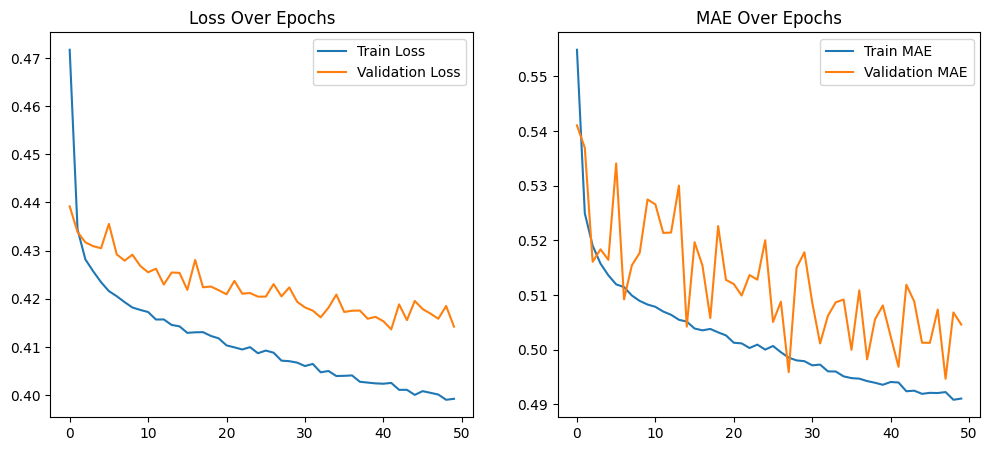

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.legend()

plt.show()